In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd#
import numpy as np
import scipy as sp
import matplotlib
import os
import sklearn
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

#SMOTE and IMBLearn
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#Plotly Libraries
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import chart_studio
from scipy import signal
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

In [2]:
df= pd.read_csv('final_one_for_class_weights_stnd_data.csv')

In [3]:
df.shape

(26126, 25)

In [4]:
df

,Power,Spindle,vibration,roll_mean_Power,roll_std_Power,roll_min_Power,roll_max_Power,roll_EME_Power,roll_IQR_Power,roll_skew_Power,roll_mean_Spindle,roll_std_Spindle,roll_min_Spindle,roll_max_Spindle,roll_EME_Spindle,roll_IQR_Spindle,roll_skew_Spindle,roll_mean_vibration,roll_std_vibration,roll_min_vibration,roll_max_vibration,roll_EME_vibration,roll_IQR_vibration,roll_skew_vibration,Label_Numeric
0,0.704504,-0.656656,-0.084409,-5.243308,3.549036,-8.273532,0.237851,-0.850778,-0.454735,1.763536,-0.894810,-0.794447,-0.436556,-0.891522,-0.561806,-0.672802,-0.718196,-0.338410,0.153263,-0.362442,-0.163626,-0.157717,-0.194306,1.940044,0
1,0.693592,-0.270631,-0.084409,-3.705873,4.412749,-8.273532,0.237851,-0.570332,13.084977,0.318055,-0.789580,-0.504153,-0.436556,-0.617958,-0.550103,-0.672802,1.657976,-0.275950,0.243939,-0.362442,-0.163626,-0.155242,0.617664,0.317541,0
2,0.705959,-0.259266,-0.084409,-2.165217,4.414593,-8.273532,0.238714,-0.288709,13.110000,-0.762990,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.213490,0.243939,-0.362442,-0.163626,-0.152767,0.617664,-0.895892,0
3,0.685590,-0.656656,-0.084409,-0.629865,3.544424,-8.273532,0.238714,-0.009022,-0.411362,-2.208437,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.151029,0.153263,-0.362442,-0.163626,-0.150292,-0.194306,-2.518395,0
4,0.692137,-0.643987,-0.084409,0.907191,-0.300801,1.455817,0.238714,0.271287,-0.426376,-0.175717,-0.677799,-0.437396,-0.436556,-0.609904,-0.537689,-0.252914,-0.072604,-0.088569,-0.250196,-0.012533,-0.163626,-0.147817,-0.194306,-0.289175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26121,0.433161,1.635646,0.064349,0.487805,-0.085733,0.482722,0.092613,0.123167,-0.424707,-2.186625,1.446901,1.115797,-0.436556,0.989496,1.002605,0.851926,-1.851743,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26122,0.438496,-0.640820,0.064349,0.577024,-0.298003,1.039291,0.092613,0.153365,-0.431936,0.896485,0.763519,1.291478,-0.436556,0.989496,0.502827,1.803361,-0.560021,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26123,0.451590,2.272624,0.064349,0.581002,-0.298183,1.039291,0.092613,0.154755,-0.424707,-0.097931,0.838480,1.431031,-0.436556,1.184371,0.623404,1.803361,-0.416993,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26124,0.436071,-0.075569,-0.010030,0.574877,-0.302332,1.039291,0.087868,0.152614,-0.431380,0.311312,0.996883,1.230144,-0.394501,1.184371,0.649921,1.188526,-0.394843,0.051966,-0.149331,0.074945,-0.040807,-0.134050,-0.194306,-2.518395,0


In [5]:
df['Label_Numeric'].value_counts()

0    16315
1     9811
Name: Label_Numeric, dtype: int64

In [7]:
import scipy.stats as stats

frame_size = 30
hop_size = 10

In [8]:
def get_frames(df, frame_size, hop_size):
    

    N_FEATURES = 24

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        N_AccX = df['Power'].values[i: i + frame_size]
        N_AccY = df['Spindle'].values[i: i + frame_size]
        N_AccZ = df['vibration'].values[i: i + frame_size]
        N_GyroX = df['roll_mean_Power'].values[i: i + frame_size]
        N_GyroY = df['roll_std_Power'].values[i: i + frame_size]
        N_GyroZ = df['roll_min_Power'].values[i: i + frame_size]
        T_AccX = df['roll_max_Power'].values[i: i + frame_size]
        T_AccY = df['roll_EME_Power'].values[i: i + frame_size] 
        T_AccZ = df['roll_IQR_Power'].values[i: i + frame_size]
        
        roll_std_NAccX = df['roll_skew_Power'].values[i: i + frame_size]
        roll_IQR_TGyroX = df['roll_mean_Spindle'].values[i: i + frame_size]
        roll_EME_TGyrozz = df['roll_std_Spindle'].values[i: i + frame_size]
        roll_EME_TGyroZ = df['roll_min_Spindle'].values[i: i + frame_size]
        roll_EME_TGyroY = df['roll_max_Spindle'].values[i: i + frame_size]
        roll_skew_NGyroZ = df['roll_EME_Spindle'].values[i: i + frame_size]
        roll_max_NAccX = df['roll_IQR_Spindle'].values[i: i + frame_size]
        roll_mad_NGyroZ = df['roll_skew_Spindle'].values[i: i + frame_size]
        roll_mean_NGyroZ = df['roll_mean_vibration'].values[i: i + frame_size]
        roll_max_NGyroX = df['roll_std_vibration'].values[i: i + frame_size]
        roll_mean_NAccY = df['roll_min_vibration'].values[i: i + frame_size]
        roll_mean_NAccX = df['roll_max_vibration'].values[i: i + frame_size]
        roll_mad_NAccY = df['roll_EME_vibration'].values[i: i + frame_size]
        roll_EME_TAccX = df['roll_IQR_vibration'].values[i: i + frame_size]
        roll_kurt_NAccX = df['roll_skew_vibration'].values[i: i + frame_size]
        
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['Label_Numeric'][i: i + frame_size])[0][0]
        frames.append([N_AccX,N_AccY,N_AccZ,N_GyroX,N_GyroY,N_GyroZ,T_AccX,T_AccY,T_AccZ,roll_std_NAccX,roll_IQR_TGyroX,roll_EME_TGyrozz,roll_EME_TGyroZ,roll_EME_TGyroY,roll_skew_NGyroZ, 
                       roll_max_NAccX,roll_mad_NGyroZ,roll_mean_NGyroZ,roll_max_NGyroX,roll_mean_NAccY,
                       roll_mean_NAccX,roll_mad_NAccY,roll_EME_TAccX,roll_kurt_NAccX])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [9]:
X,y = get_frames(df, frame_size, hop_size)

X.shape,y.shape

((2610, 30, 24), (2610,))

In [10]:
print(len(X))

2610


In [11]:
y.shape

(2610,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
V_train, end_test, vl_train, test_label = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)

In [13]:
print("Shape of Train Features",X_train.shape)
print("Shape of Train Labels",y_train.shape)

print("Shape of validation Features",V_train.shape)
print("Shape of validation Labels",vl_train.shape)

print("Shape of Test Features",end_test.shape)
print("Shape of Test Labels",test_label.shape)

Shape of Train Features (2088, 30, 24)
Shape of Train Labels (2088,)
Shape of validation Features (261, 30, 24)
Shape of validation Labels (261,)
Shape of Test Features (261, 30, 24)
Shape of Test Labels (261,)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv1D,Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import optimizers


In [15]:
def create_network():
    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size=2, padding='same' ,strides=1, activation='relu', input_shape = X_train[0].shape))
    model.add(Conv1D(filters=4, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Conv1D(filters=4, kernel_size=2, padding='same' , strides=1, activation='relu'))
    model.add(Conv1D(filters=8, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Conv1D(filters=8, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    #stochastic gradient descent
    sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [41]:
def create_network_lsmt(): 
    model = Sequential()
    model.add(LSTM(16, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(8, return_sequences=True))
    model.add(LSTM(8, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(LSTM(4, return_sequences=True))
    model.add(LSTM(4, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(8))
    model.add(Dense(4))
    model.add(Dense(1, activation='sigmoid'))

    sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    #adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [32]:
#  Hybrid Model of 1D CNN and LSTM
 # LFLB1
def creat_network_hybrid():
    model = Sequential()
    model.add(Conv1D(filters=4, kernel_size=2, padding='same' ,strides=1, activation='relu', input_shape = X_train[0].shape)) 
    model.add(Conv1D(filters=8, kernel_size=2, padding='same' ,strides=1, activation='relu'))
    model.add(Dropout(0.1))

    model.add(LSTM(16, return_sequences=True, input_shape= (X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(16, return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
#     model.add(Dense(8, activation='relu'))
#     model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense,TimeDistributed,MaxPooling1D, Reshape
from tensorflow.keras.optimizers import SGD

In [17]:
model = create_network()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 4)             196       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 30, 4)             36        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 30, 4)             36        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 8)             72        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 30, 8)             136       
_________________________________________________________________
dropout (Dropout)            (None, 30, 8)             0         
_________________________________________________________________
flatten (Flatten)            (None, 240)               0

In [42]:
model1 = create_network_lsmt()
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 16)            2624      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 16)            2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 16)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 8)             800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 8)             544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 8)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 4)            

In [34]:
model2 = creat_network_hybrid()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 30, 4)             196       
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 30, 8)             72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 8)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 30, 16)            1600      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 16)            2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 16)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

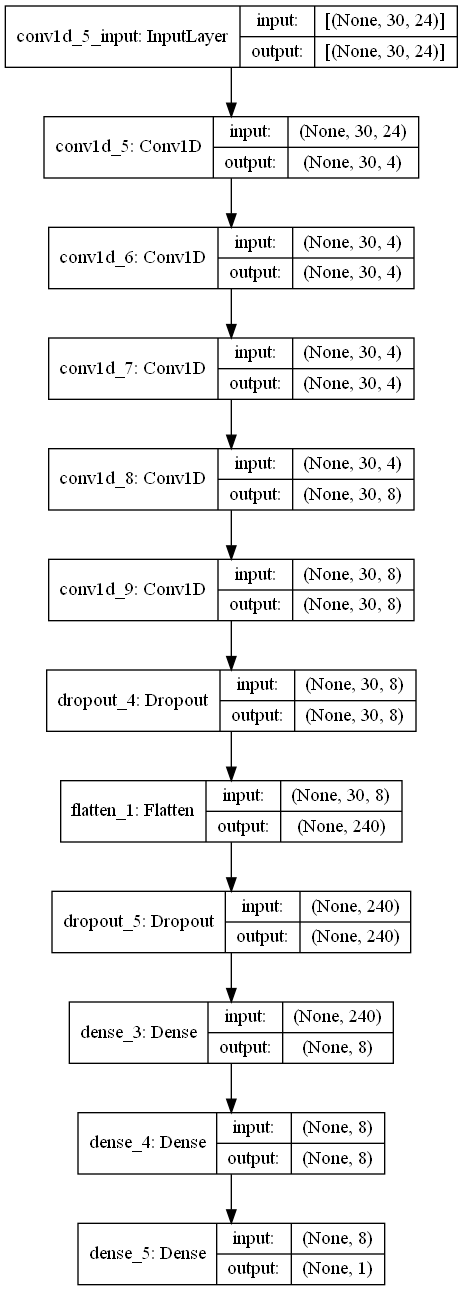

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model, "my_first_model.png", show_shapes=True)

In [18]:
class_weight = {0: 0.6686,
            1: 1.3314
               }

In [19]:
import livelossplot
#from livelossplot import PlotLossesKeras
from livelossplot import PlotLossesKerasTF
# from livelossplot.tf_keras import PlotLossesCallback
plot_losses = livelossplot.PlotLossesKerasTF()
plot_losses_hybrid = livelossplot.PlotLossesKerasTF()
plot_losses_lstm = livelossplot.PlotLossesKerasTF()
# plot_losses = livelossplot.PlotLossesKeras()
from tensorflow.keras.callbacks import EarlyStopping

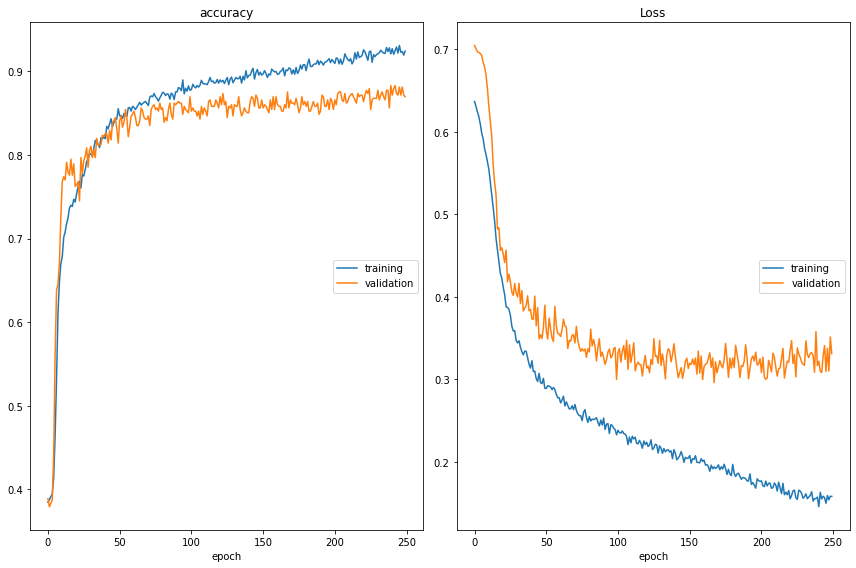

accuracy
	training         	 (min:    0.385, max:    0.931, cur:    0.924)
	validation       	 (min:    0.379, max:    0.883, cur:    0.870)
Loss
	training         	 (min:    0.146, max:    0.637, cur:    0.158)
	validation       	 (min:    0.296, max:    0.705, cur:    0.331)
Training time:  841.6880402565002


In [20]:
import time
start_time = time.time()

history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), shuffle=True, epochs=250,batch_size=4,verbose=1,class_weight=class_weight,callbacks=[plot_losses])

end_time = time.time()
training_time = end_time - start_time
print("Training time: ", training_time)

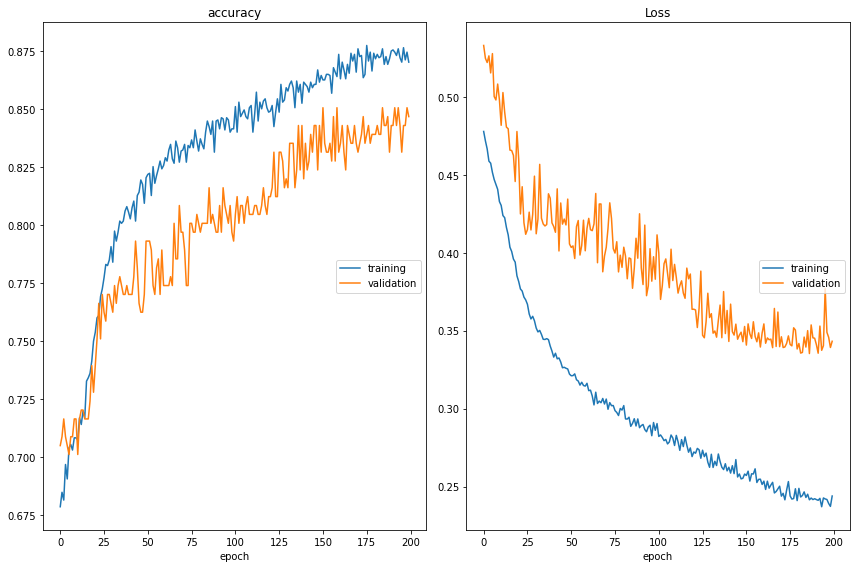

accuracy
	training         	 (min:    0.679, max:    0.877, cur:    0.870)
	validation       	 (min:    0.701, max:    0.851, cur:    0.847)
Loss
	training         	 (min:    0.237, max:    0.478, cur:    0.244)
	validation       	 (min:    0.335, max:    0.533, cur:    0.343)


In [37]:
history_hybrid = model2.fit(X_train, y_train,  validation_data=(V_train, vl_train), shuffle=True, epochs=200,batch_size=4,verbose=1,class_weight=class_weight,callbacks=[plot_losses_hybrid])

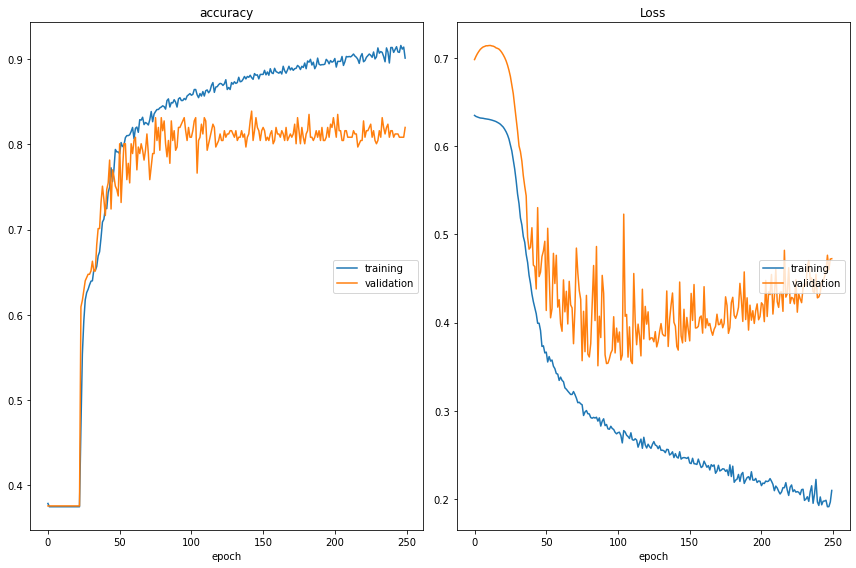

accuracy
	training         	 (min:    0.375, max:    0.916, cur:    0.901)
	validation       	 (min:    0.375, max:    0.839, cur:    0.820)
Loss
	training         	 (min:    0.191, max:    0.635, cur:    0.210)
	validation       	 (min:    0.351, max:    0.714, cur:    0.473)


In [45]:
history_lstm = model1.fit(X_train, y_train,  validation_data=(V_train, vl_train), shuffle=True, epochs=250,batch_size=4,verbose=1,class_weight=class_weight,callbacks=[plot_losses_lstm])

In [25]:
model.save('CNN_model_hybrid.h5')

In [31]:
model1.save('LSTM_model_hybrid.h5')

In [57]:
model2.save('hybrid_model.h5')

In [22]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

In [23]:
# model.save('LSTM_model.h5')

In [56]:
from tensorflow import keras

model_cnn = keras.models.load_model('CNN_model_hybrid.h5')
model_lstm = keras.models.load_model('LSTM_model_hybrid.h5')
model_hybrid = keras.models.load_model('hybrid_model.h5')

# CNN _prediction:

In [60]:
%%time
cnn_rounded_predictions = model_cnn.predict_proba(end_test)
cnn_rounded_predictions = (cnn_rounded_predictions > 0.5)

CPU times: total: 46.9 ms
Wall time: 49.9 ms


In [59]:
print(classification_report(test_label, cnn_rounded_predictions))
print(accuracy_score(test_label, cnn_rounded_predictions))
cf_matrix = confusion_matrix(test_label, cnn_rounded_predictions)
print(confusion_matrix(test_label, cnn_rounded_predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       164
           1       0.86      0.93      0.89        97

    accuracy                           0.92       261
   macro avg       0.91      0.92      0.91       261
weighted avg       0.92      0.92      0.92       261

0.9157088122605364
[[149  15]
 [  7  90]]


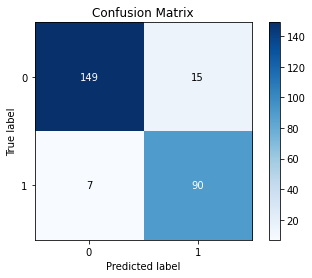

In [81]:
skplt.metrics.plot_confusion_matrix(test_label, cnn_rounded_predictions)
plt.show()

# LSTM prediction:

In [82]:
lstm_rounded_predictions = model_lstm.predict_proba(end_test)
lstm_rounded_predictions = (lstm_rounded_predictions > 0.5)

In [83]:
print(classification_report(test_label, lstm_rounded_predictions))
print(accuracy_score(test_label, lstm_rounded_predictions))
cf_matrix = confusion_matrix(test_label, lstm_rounded_predictions)
print(confusion_matrix(test_label, lstm_rounded_predictions))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       164
           1       0.87      0.89      0.88        97

    accuracy                           0.91       261
   macro avg       0.90      0.90      0.90       261
weighted avg       0.91      0.91      0.91       261

0.9080459770114943
[[151  13]
 [ 11  86]]


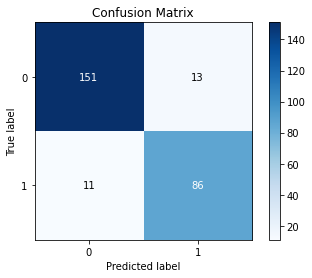

In [84]:
skplt.metrics.plot_confusion_matrix(test_label, lstm_rounded_predictions)
plt.show()

# Hybrid _prediction:

In [85]:
hybrid_rounded_predictions = model_hybrid.predict_proba(end_test)
hybrid_rounded_predictions = (hybrid_rounded_predictions > 0.5)

In [86]:
# hybrid_rounded_predictions = hybrid_rounded_predictions*1

In [87]:
print(classification_report(test_label, hybrid_rounded_predictions))
print(accuracy_score(test_label, hybrid_rounded_predictions))
cf_matrix = confusion_matrix(test_label, hybrid_rounded_predictions)
print(confusion_matrix(test_label, hybrid_rounded_predictions))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90       164
           1       0.79      0.95      0.86        97

    accuracy                           0.89       261
   macro avg       0.88      0.90      0.88       261
weighted avg       0.90      0.89      0.89       261

0.8850574712643678
[[139  25]
 [  5  92]]


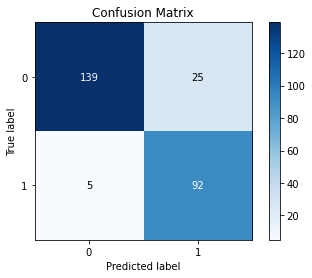

In [88]:
skplt.metrics.plot_confusion_matrix(test_label, hybrid_rounded_predictions)
plt.show()

# ROC curver Deep learning

In [47]:
from sklearn.metrics import roc_curve
y_pred_keras = model_cnn.predict(end_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, y_pred_keras)

In [48]:
#LS
y_pred_rf = model_lstm.predict(end_test).ravel()
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_label, y_pred_rf)

In [49]:
# #LS
y_pred_hb = model_hybrid.predict(end_test).ravel()
fpr_hb, tpr_hb, thresholds_hb = roc_curve(test_label, y_pred_hb)


In [71]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_rf = auc(fpr_rf, tpr_rf)
auc_hb = auc(fpr_hb, tpr_hb)

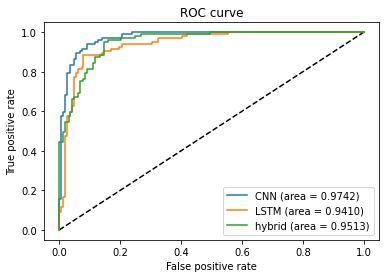

In [72]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.4f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='LSTM (area = {:.4f})'.format(auc_rf))
plt.plot(fpr_hb, tpr_hb, label='hybrid (area = {:.4f})'.format(auc_hb))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Machine Learning Implementation 

In [23]:
df

,Power,Spindle,vibration,roll_mean_Power,roll_std_Power,roll_min_Power,roll_max_Power,roll_EME_Power,roll_IQR_Power,roll_skew_Power,roll_mean_Spindle,roll_std_Spindle,roll_min_Spindle,roll_max_Spindle,roll_EME_Spindle,roll_IQR_Spindle,roll_skew_Spindle,roll_mean_vibration,roll_std_vibration,roll_min_vibration,roll_max_vibration,roll_EME_vibration,roll_IQR_vibration,roll_skew_vibration,Label_Numeric
0,0.704504,-0.656656,-0.084409,-5.243308,3.549036,-8.273532,0.237851,-0.850778,-0.454735,1.763536,-0.894810,-0.794447,-0.436556,-0.891522,-0.561806,-0.672802,-0.718196,-0.338410,0.153263,-0.362442,-0.163626,-0.157717,-0.194306,1.940044,0
1,0.693592,-0.270631,-0.084409,-3.705873,4.412749,-8.273532,0.237851,-0.570332,13.084977,0.318055,-0.789580,-0.504153,-0.436556,-0.617958,-0.550103,-0.672802,1.657976,-0.275950,0.243939,-0.362442,-0.163626,-0.155242,0.617664,0.317541,0
2,0.705959,-0.259266,-0.084409,-2.165217,4.414593,-8.273532,0.238714,-0.288709,13.110000,-0.762990,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.213490,0.243939,-0.362442,-0.163626,-0.152767,0.617664,-0.895892,0
3,0.685590,-0.656656,-0.084409,-0.629865,3.544424,-8.273532,0.238714,-0.009022,-0.411362,-2.208437,-0.681253,-0.433614,-0.436556,-0.609904,-0.537702,-0.252914,-0.069784,-0.151029,0.153263,-0.362442,-0.163626,-0.150292,-0.194306,-2.518395,0
4,0.692137,-0.643987,-0.084409,0.907191,-0.300801,1.455817,0.238714,0.271287,-0.426376,-0.175717,-0.677799,-0.437396,-0.436556,-0.609904,-0.537689,-0.252914,-0.072604,-0.088569,-0.250196,-0.012533,-0.163626,-0.147817,-0.194306,-0.289175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26121,0.433161,1.635646,0.064349,0.487805,-0.085733,0.482722,0.092613,0.123167,-0.424707,-2.186625,1.446901,1.115797,-0.436556,0.989496,1.002605,0.851926,-1.851743,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26122,0.438496,-0.640820,0.064349,0.577024,-0.298003,1.039291,0.092613,0.153365,-0.431936,0.896485,0.763519,1.291478,-0.436556,0.989496,0.502827,1.803361,-0.560021,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26123,0.451590,2.272624,0.064349,0.581002,-0.298183,1.039291,0.092613,0.154755,-0.424707,-0.097931,0.838480,1.431031,-0.436556,1.184371,0.623404,1.803361,-0.416993,0.067581,-0.250196,0.162422,-0.040807,-0.132349,-0.194306,-0.289175,0
26124,0.436071,-0.075569,-0.010030,0.574877,-0.302332,1.039291,0.087868,0.152614,-0.431380,0.311312,0.996883,1.230144,-0.394501,1.184371,0.649921,1.188526,-0.394843,0.051966,-0.149331,0.074945,-0.040807,-0.134050,-0.194306,-2.518395,0


In [24]:
X_test = df.iloc[:,0:-1]
Y_test = df.iloc[:,-1]

In [27]:
df.corr()

,Power,Spindle,vibration,roll_mean_Power,roll_std_Power,roll_min_Power,roll_max_Power,roll_EME_Power,roll_IQR_Power,roll_skew_Power,roll_mean_Spindle,roll_std_Spindle,roll_min_Spindle,roll_max_Spindle,roll_EME_Spindle,roll_IQR_Spindle,roll_skew_Spindle,roll_mean_vibration,roll_std_vibration,roll_min_vibration,roll_max_vibration,roll_EME_vibration,roll_IQR_vibration,roll_skew_vibration,Label_Numeric
Power,1.000000,0.297077,0.136306,0.758871,0.416487,0.633756,0.615002,0.467822,0.330007,0.037827,0.403786,0.364195,0.190321,0.408533,0.316839,0.292084,-0.150479,0.144910,0.092484,0.127555,0.148285,0.059751,0.080824,0.004756,0.332917
Spindle,0.297077,1.000000,-0.003516,0.382536,0.096732,0.370002,0.225524,0.137922,0.181011,-0.008789,0.758790,0.604224,0.389834,0.695199,0.621443,0.535481,-0.314127,-0.001377,0.003860,-0.004477,0.000602,-0.035286,0.005344,-0.007330,0.294498
vibration,0.136306,-0.003516,1.000000,0.170347,-0.014697,0.224232,0.066957,0.048836,-0.012929,-0.030977,-0.005253,0.021404,-0.034147,0.008885,-0.024602,0.020059,-0.050452,0.938803,0.371563,0.908012,0.867874,0.897019,0.324826,-0.012851,-0.030853
roll_mean_Power,0.758871,0.382536,0.170347,1.000000,0.531835,0.828167,0.794073,0.609672,0.472869,0.033640,0.526090,0.469200,0.250655,0.527540,0.394682,0.387453,-0.193610,0.184598,0.106709,0.166065,0.184886,0.076344,0.090596,-0.005107,0.418211
roll_std_Power,0.416487,0.096732,-0.014697,0.531835,1.000000,0.019243,0.930927,0.864082,0.483590,0.169000,0.144681,0.158086,0.052256,0.173019,0.201067,0.078144,-0.007636,-0.014894,0.001871,-0.020787,-0.013038,-0.015913,0.012580,0.003060,0.006901
roll_min_Power,0.633756,0.370002,0.224232,0.828167,0.019243,1.000000,0.379793,0.259100,0.100626,-0.020751,0.503891,0.435101,0.246138,0.488833,0.313931,0.393201,-0.228759,0.241538,0.131449,0.224069,0.240763,0.109682,0.099837,-0.008610,0.489088
roll_max_Power,0.615002,0.225524,0.066957,0.794073,0.930927,0.379793,1.000000,0.887861,0.474198,0.152586,0.319150,0.306844,0.138396,0.340395,0.302903,0.216677,-0.090066,0.073134,0.049222,0.061312,0.074682,0.024538,0.047534,0.000937,0.184882
roll_EME_Power,0.467822,0.137922,0.048836,0.609672,0.864082,0.259100,0.887861,1.000000,0.222218,0.037445,0.192216,0.179260,0.072814,0.196200,0.168746,0.138141,-0.072530,0.053419,0.031489,0.047164,0.053228,0.020370,0.027945,-0.016413,0.115464
roll_IQR_Power,0.330007,0.181011,-0.012929,0.472869,0.483590,0.100626,0.474198,0.222218,1.000000,0.060439,0.244960,0.208491,0.140289,0.249621,0.228959,0.144664,-0.022325,-0.011272,0.002426,-0.019036,-0.010791,-0.019103,0.024800,0.002802,0.078263
roll_skew_Power,0.037827,-0.008789,-0.030977,0.033640,0.169000,-0.020751,0.152586,0.037445,0.060439,1.000000,-0.010715,-0.014143,0.008709,-0.007752,-0.003927,-0.028404,0.015117,-0.034600,0.006916,-0.043546,-0.026378,-0.018521,0.012383,0.067985,-0.052913


In [39]:
from scipy import stats
r,p = stats.pearsonr(df.Spindle,df.roll_IQR_Power)
print(round(r,4))
print(round(p,1000))

0.181
nan


In [91]:
X_train_ml, X_test, y_train_ml, y_test = train_test_split(X_test, Y_test, test_size = 0.2, random_state = 0, stratify = Y_test)
V_train, end_test_ml, vl_train, test_label_ml = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)

In [92]:
print("Shape of Train Features",X_train_ml.shape)
print("Shape of Train Labels",y_train_ml.shape)

print("Shape of validation Features",V_train.shape)
print("Shape of validation Labels",vl_train.shape)

print("Shape of Test Features",end_test_ml.shape)
print("Shape of Test Labels",test_label_ml.shape)

Shape of Train Features (20900, 24)
Shape of Train Labels (20900,)
Shape of validation Features (2613, 24)
Shape of validation Labels (2613,)
Shape of Test Features (2613, 24)
Shape of Test Labels (2613,)


In [93]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import scikitplot as skplt

# Random Forest Classifier

In [1]:
RF = RandomForestClassifier(n_estimators=4 , min_samples_split = 6, class_weight='balanced')
RF.fit(X_train_ml,y_train_ml)
random = RF.predict(end_test_ml)

NameError: name 'RandomForestClassifier' is not defined

In [95]:
print(classification_report(test_label_ml, random))
print(accuracy_score(test_label_ml, random))
cf_matrix = confusion_matrix(test_label_ml, random)
print(confusion_matrix(test_label_ml, random))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1632
           1       0.86      0.84      0.85       981

    accuracy                           0.89      2613
   macro avg       0.88      0.88      0.88      2613
weighted avg       0.89      0.89      0.89      2613

0.8901645618063528
[[1502  130]
 [ 157  824]]


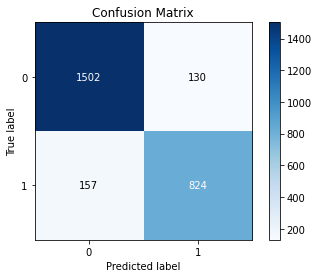

In [96]:
skplt.metrics.plot_confusion_matrix(test_label_ml, random)
plt.show()

# MLP Classifier

In [97]:
MLP = MLPClassifier(max_iter=200,
                    learning_rate='constant',
                    power_t=0.5, solver='lbfgs', alpha=0.0001, random_state=100)
MLP.fit(X_train_ml,y_train_ml)
random_MLP = MLP.predict(end_test_ml)

In [98]:
print(classification_report(test_label_ml, random_MLP))
print(accuracy_score(test_label_ml, random_MLP))
cf_matrix = confusion_matrix(test_label_ml, random_MLP)
print(confusion_matrix(test_label_ml, random_MLP))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1632
           1       0.83      0.85      0.84       981

    accuracy                           0.88      2613
   macro avg       0.87      0.87      0.87      2613
weighted avg       0.88      0.88      0.88      2613

0.8756218905472637
[[1459  173]
 [ 152  829]]


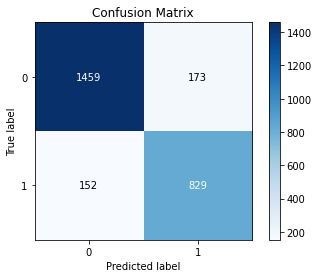

In [99]:
skplt.metrics.plot_confusion_matrix(test_label_ml, random_MLP)
plt.show()

# XGB Classifier

In [100]:
xgbo = XGBClassifier(learning_rate=0.1 , max_depth=5 ,base_score=0.3)
xgbo.fit(X_train_ml,y_train_ml)
random_xgbo = xgbo.predict(end_test_ml)

In [101]:
print(classification_report(test_label_ml, random_xgbo))
print(accuracy_score(test_label_ml, random_xgbo))
cf_matrix = confusion_matrix(test_label_ml, random_xgbo)
print(confusion_matrix(test_label_ml, random_xgbo))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1632
           1       0.85      0.89      0.87       981

    accuracy                           0.90      2613
   macro avg       0.89      0.90      0.89      2613
weighted avg       0.90      0.90      0.90      2613

0.8993494068120934
[[1477  155]
 [ 108  873]]


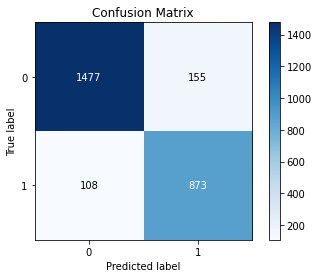

In [102]:
skplt.metrics.plot_confusion_matrix(test_label_ml, random_xgbo)
plt.show()

# ROC Machine Learning and Deep Learning

In [103]:
y_pred_RF = RF.fit(X_train_ml,y_train_ml).predict_proba(end_test_ml)[:,1]
y_pred_XGB = xgbo.fit(X_train_ml,y_train_ml).predict_proba(end_test_ml)[:,1]
y_pred_MLP = MLP.fit(X_train_ml,y_train_ml).predict_proba(end_test_ml)[:,1]

In [104]:
from sklearn.metrics import roc_curve
y_pred_keras = model_cnn.predict(end_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label, y_pred_keras)

In [105]:
#LS
y_pred_rf = model_lstm.predict(end_test).ravel()
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_label, y_pred_rf)

In [106]:
# #LS
y_pred_hb = model_hybrid.predict(end_test).ravel()
fpr_hb, tpr_hb, thresholds_hb = roc_curve(test_label, y_pred_hb)

In [107]:
#machine learning
fpr_keras_ml, tpr_keras_ml, thresholds_keras_ml = roc_curve(test_label_ml, y_pred_RF)
fpr_xgb, tpr_xgb, thresholds_keras = roc_curve(test_label_ml, y_pred_XGB)
fpr_mlp, tpr_mlp, thresholds_keras = roc_curve(test_label_ml, y_pred_MLP)

In [108]:
from sklearn.metrics import auc
auc_rf_ml = auc(fpr_keras_ml, tpr_keras_ml)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_mlp = auc(fpr_mlp, tpr_mlp)

In [109]:
from sklearn.metrics import auc


auc_keras = auc(fpr_keras, tpr_keras)
auc_rf = auc(fpr_rf, tpr_rf)
auc_hb = auc(fpr_hb, tpr_hb)

In [110]:
from matplotlib import pyplot


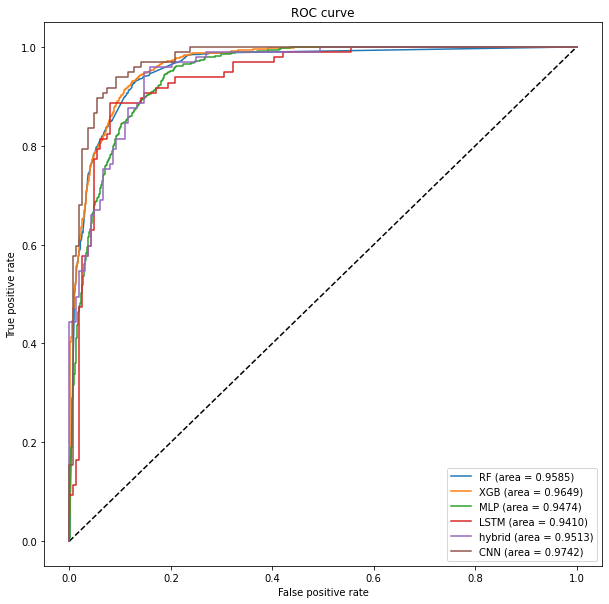

In [112]:
fig = pyplot.figure(figsize=(10, 10))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras_ml, tpr_keras_ml, label='RF (area = {:.4f})'.format(auc_rf_ml))
plt.plot(fpr_xgb, tpr_xgb, label='XGB (area = {:.4f})'.format(auc_xgb))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = {:.4f})'.format(auc_mlp))
plt.plot(fpr_rf, tpr_rf, label='LSTM (area = {:.4f})'.format(auc_rf))
plt.plot(fpr_hb, tpr_hb, label='hybrid (area = {:.4f})'.format(auc_hb))
plt.plot(fpr_keras, tpr_keras, label='CNN (area = {:.4f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()